EDA (Exploratory Data Analysis) - HR Attrition Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: load your HR dataset
df = pd.read_csv('C:/Users/farhan/Documents/Power Bi Maven Analytics/Profile/HR Attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv',
    encoding='latin-1')

In [5]:
df.rename(columns={"ï»¿Age": "Age"}, inplace=True)

In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [8]:
corr_matrix = numeric_df.corr()

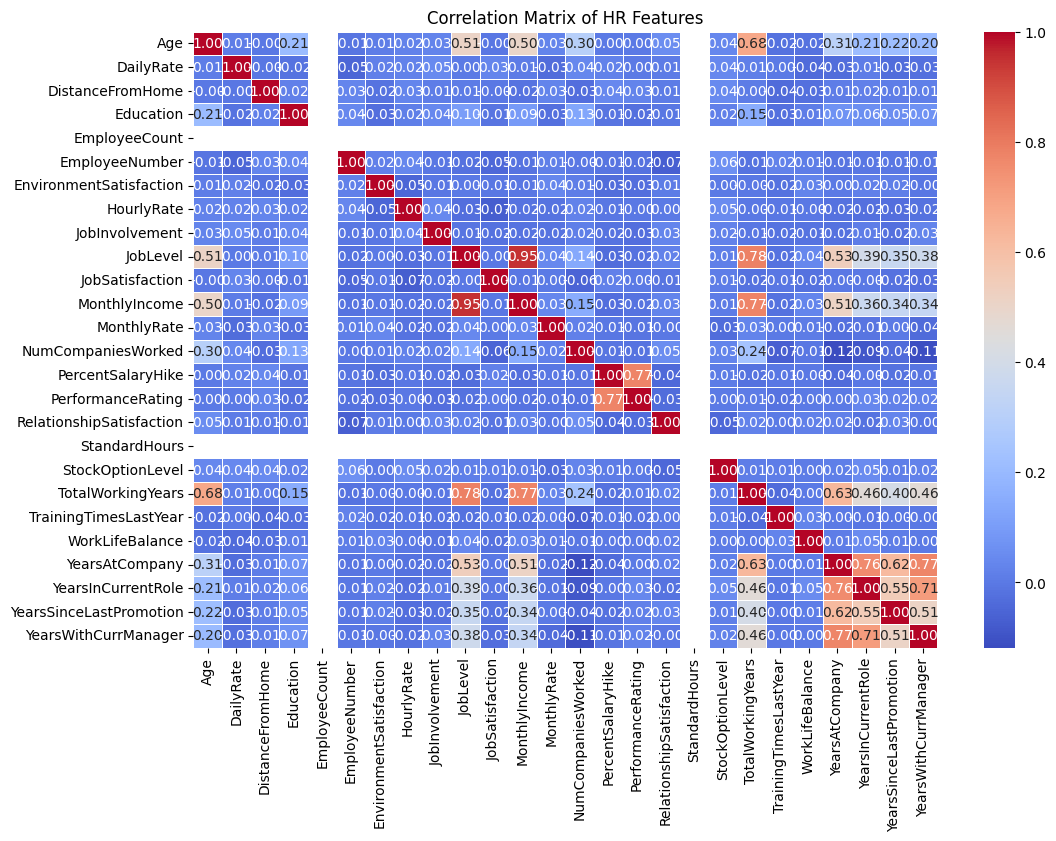

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of HR Features")
plt.show()

DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
ï»¿Age                     -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
Name: Attrition_Flag, dtype: float64
C

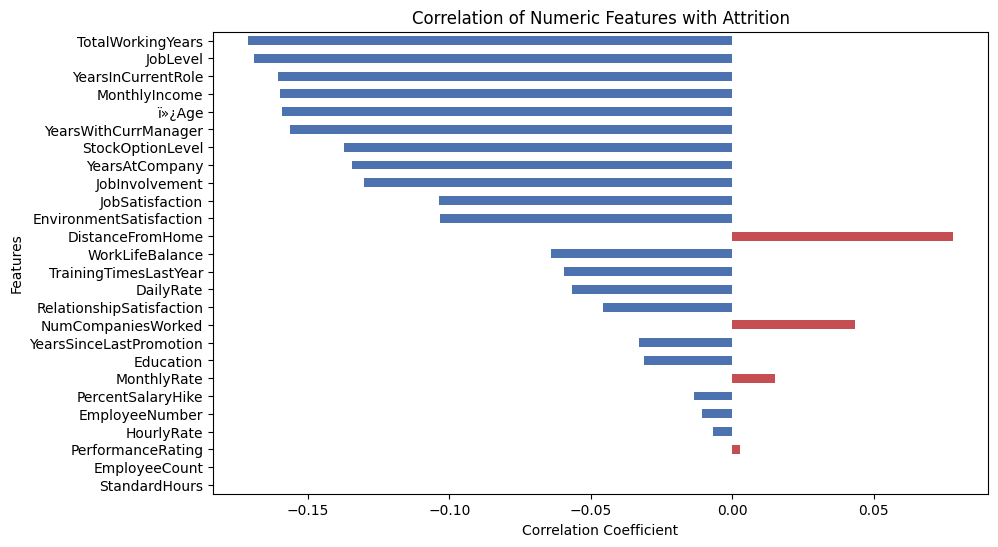

In [6]:


# Convert Attrition to numeric (Yes=1, No=0)
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlate Attrition_Flag with all other numeric features
attrition_corr = numeric_df.corr()['Attrition_Flag'].drop('Attrition_Flag')

# Display results sorted by correlation strength
print(attrition_corr.sort_values(ascending=False))

attrition_corr_sorted = attrition_corr.sort_values(key=abs, ascending=False)

# Print results
print("Correlation of features with Attrition:")
print(attrition_corr_sorted)

# Step 5: Visualization
plt.figure(figsize=(10,6))
attrition_corr_sorted.plot(kind='barh', color=['#c44e52' if v>0 else '#4c72b0' for v in attrition_corr_sorted])
plt.title("Correlation of Numeric Features with Attrition")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # highest correlation at top
plt.show()
